## データの理解・可視化

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
dir_path = "/Users/kawaiyuya/Downloads/titanic/"

In [5]:
train_df = pd.read_csv(dir_path + "train.csv")

In [6]:
test_df = pd.read_csv(dir_path + "test.csv")

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
print("学習データの大きさ", train_df.shape)
print("学習データの大きさ", test_df.shape)

学習データの大きさ (891, 12)
学習データの大きさ (418, 11)


In [10]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [14]:
df.shape

(1309, 12)

In [15]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [16]:
df.groupby("Sex")["PassengerId"].count()

Sex
female    466
male      843
Name: PassengerId, dtype: int64

In [17]:
tmp = df.groupby("Sex")["PassengerId"].count()

In [18]:
tmp.index

Index(['female', 'male'], dtype='object', name='Sex')

In [19]:
tmp.values

array([466, 843])

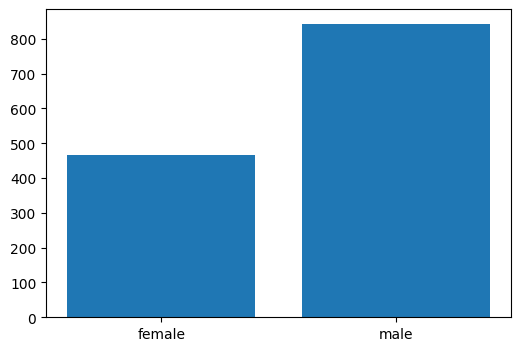

In [40]:
plt.figure(figsize=(6, 4))
plt.bar(tmp.index, tmp.values)
plt.show()

<Axes: xlabel='Sex'>

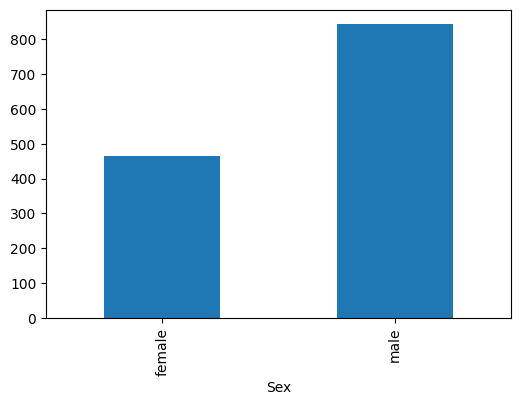

In [41]:
tmp.plot(kind='bar', figsize=(6,4))

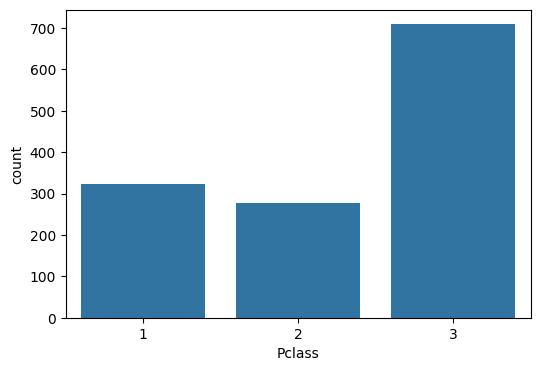

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass")
plt.show()

## データの加工・前処理

In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df2 = df.drop(columns=['Name', 'SibSp', 'Parch', 'Fare', 'Ticket'])

In [21]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,Cabin,Embarked
0,1,0.0,3,male,22.0,NaN,S
1,2,1.0,1,female,38.0,C85,C
2,3,1.0,3,female,26.0,NaN,S
3,4,1.0,1,female,35.0,C123,S
4,5,0.0,3,male,35.0,NaN,S


In [22]:
df2["Embarked"].isnull().sum()

2

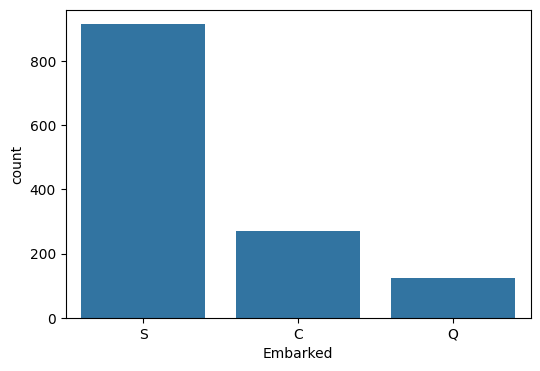

In [53]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_2, x="Embarked")
plt.show()

In [26]:
df3 = df2.copy()
df3["Embarked"] = df3["Embarked"].fillna("S")

In [27]:
df3["Embarked"].isnull().sum()

0

In [28]:
df3["Age"].isnull().sum()

263

In [29]:
print(df3["Age"].min())
print(df3["Age"].max())

0.17
80.0


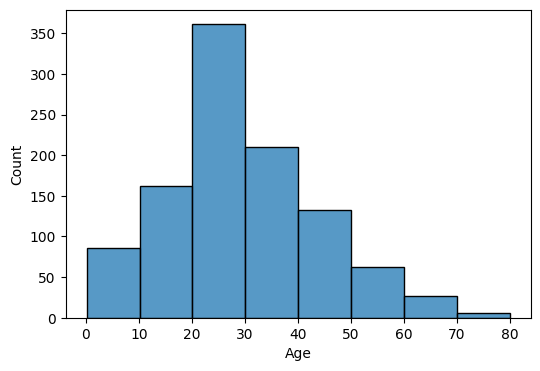

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(df3["Age"], kde=False, bins=8)
plt.show()

In [31]:
print(df3["Age"].mean())
print(df3["Age"].median())

29.881137667304014
28.0


In [32]:
df4 = df3.copy()

In [33]:
median = df4["Age"].median()

In [34]:
df4["Age"] = df4["Age"].fillna(median)

In [35]:
df4['Age'].isnull().sum()

0

In [38]:
ohe_embarked = pd.get_dummies(df4["Embarked"], prefix="Embarked")
ohe_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [39]:
df5 = pd.concat([df4, ohe_embarked], axis=1)
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,NaN,S,False,False,True
1,2,1.0,1,female,38.0,C85,C,True,False,False
2,3,1.0,3,female,26.0,NaN,S,False,False,True
3,4,1.0,1,female,35.0,C123,S,False,False,True
4,5,0.0,3,male,35.0,NaN,S,False,False,True


In [40]:
df6 = df5.drop(columns=["Embarked"])
df6.head()

,PassengerId,Survived,Pclass,Sex,Age,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,NaN,False,False,True
1,2,1.0,1,female,38.0,C85,True,False,False
2,3,1.0,3,female,26.0,NaN,False,False,True
3,4,1.0,1,female,35.0,C123,False,False,True
4,5,0.0,3,male,35.0,NaN,False,False,True


In [43]:
df6["Sex"] = pd.get_dummies(df6["Sex"], drop_first=True)
df6.head()

,PassengerId,Survived,Pclass,Sex,Age,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,True,22.0,NaN,False,False,True
1,2,1.0,1,False,38.0,C85,True,False,False
2,3,1.0,3,False,26.0,NaN,False,False,True
3,4,1.0,1,False,35.0,C123,False,False,True
4,5,0.0,3,True,35.0,NaN,False,False,True


In [51]:
df7 = df6.drop(columns=['Cabin'])
df7.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,True,22.0,False,False,True
1,2,1.0,1,False,38.0,True,False,False
2,3,1.0,3,False,26.0,False,False,True
3,4,1.0,1,False,35.0,False,False,True
4,5,0.0,3,True,35.0,False,False,True


In [52]:
df7['Survived'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1304     True
1305     True
1306     True
1307     True
1308     True
Name: Survived, Length: 1309, dtype: bool

In [56]:
train = df7[~df7["Survived"].isnull()]
test = df7[df7["Survived"].isnull()]
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass    Sex   Age  Embarked_C  Embarked_Q  \
0            1       0.0       3   True  22.0       False       False   
1            2       1.0       1  False  38.0        True       False   
2            3       1.0       3  False  26.0       False       False   
3            4       1.0       1  False  35.0       False       False   
4            5       0.0       3   True  35.0       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
     PassengerId  Survived  Pclass    Sex   Age  Embarked_C  Embarked_Q  \
891          892       NaN       3   True  34.5       False        True   
892          893       NaN       3  False  47.0       False       False   
893          894       NaN       2   True  62.0       False        True   
894          895       NaN       3   True  27.0       False       False   
895          896       NaN       3  False  22.0       False       False   

     Embarked_

In [54]:
test = test.drop(columns=['Survived'])
test.head()

,PassengerId,Pclass,Sex,Age,Cabin,Embarked_C,Embarked_Q,Embarked_S
891,892,3,True,34.5,NaN,False,True,False
892,893,3,False,47.0,NaN,False,False,True
893,894,2,True,62.0,NaN,False,True,False
894,895,3,True,27.0,NaN,False,False,True
895,896,3,False,22.0,NaN,False,False,True


In [57]:
y_train = train["Survived"]
x_train = train.drop(columns=["PassengerId", "Survived"])

print('元のdf', train.shape)
print('目的変数', y_train.shape)
print('説明変数', x_train.shape)

元のdf (891, 8)
目的変数 (891,)
説明変数 (891, 6)


In [58]:
x_train.head()

,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,3,True,22.0,False,False,True
1,1,False,38.0,True,False,False
2,3,False,26.0,False,False,True
3,1,False,35.0,False,False,True
4,3,True,35.0,False,False,True


In [59]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

## モデルの作成

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

## モデルの評価

In [64]:
from sklearn.model_selection import train_test_split
x_tr, x_va, y_tr, y_va = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [65]:
print('学習用', x_tr.shape, y_tr.shape)
print('評価用', x_va.shape, y_va.shape)

学習用 (712, 6) (712,)
評価用 (179, 6) (179,)


In [66]:
y_tr.value_counts()

Survived
0.0    444
1.0    268
Name: count, dtype: int64

In [67]:
y_va.value_counts()

Survived
0.0    105
1.0     74
Name: count, dtype: int64

In [68]:
x_tr, x_va, y_tr, y_va = train_test_split(
    x_train,
    y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

In [70]:
print('学習用', y_tr.value_counts())
print('評価用', y_va.value_counts())

学習用 Survived
0.0    439
1.0    273
Name: count, dtype: int64
評価用 Survived
0.0    110
1.0     69
Name: count, dtype: int64


In [71]:
model = model.fit(x_tr, y_tr)

In [73]:
y_tr_pred = model.predict(x_tr)
y_va_pred = model.predict(x_va)

In [76]:
y_va_pred[:5]

array([0., 0., 0., 0., 1.])

In [77]:
y_va[:5].values

array([0., 0., 1., 0., 1.])

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_tr = accuracy_score(y_tr, y_tr_pred)
accuracy_va = accuracy_score(y_va, y_va_pred)

In [81]:
print('学習データ', accuracy_tr)
print('評価データ', accuracy_va)

学習データ 0.9058988764044944
評価データ 0.7932960893854749


In [82]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,NaN,3,True,34.5,False,True,False
892,893,NaN,3,False,47.0,False,False,True
893,894,NaN,2,True,62.0,False,True,False
894,895,NaN,3,True,27.0,False,False,True
895,896,NaN,3,False,22.0,False,False,True


In [83]:
x_test = test.drop(columns=["PassengerId", "Survived"])
y_test_pred = model.predict(x_test)

In [84]:
y_test_pred[:5]

array([0., 0., 0., 0., 1.])

In [85]:
test["Survived"] = y_test_pred

/var/folders/97/m1z9qj9x5s78_v_z0nd35kb80000gn/T/ipykernel_1700/4268022739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Survived"] = y_test_pred


In [86]:
test = test.drop(columns=["Survived"])
test["Survived"] = y_test_pred

In [87]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,Survived
891,892,3,True,34.5,False,True,False,0.0
892,893,3,False,47.0,False,False,True,0.0
893,894,2,True,62.0,False,True,False,0.0
894,895,3,True,27.0,False,False,True,0.0
895,896,3,False,22.0,False,False,True,1.0


In [88]:
submit_df = test[["PassengerId", "Survived"]].set_index("PassengerId")
submit_df.head()

,Survived
PassengerId,
892,0.0
893,0.0
894,0.0
895,0.0
896,1.0


In [89]:
submit_df["Survived"] = submit_df["Survived"].astype(int)
submit_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [90]:
submit_df.to_csv("submission.csv")